In [ ]:
#import libraries for generating report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#Import Pandas
import pandas as pd
#Import numpy
import numpy as np

In [ ]:
# Read the training data from the drive
train = pd.read_csv('/content/train_all_tasks.csv',',', names=['rewire_id', 'text','label_sexist', 'label_category', 'label_vector'])
train=train.drop(train.index[0:1])
train.head()

<ipython-input-4-4fbdf98fdeb0>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  train = pd.read_csv('/content/train_all_tasks.csv',',', names=['rewire_id', 'text','label_sexist', 'label_category', 'label_vector'])


,rewire_id,text,label_sexist,label_category,label_vector
1,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
2,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
3,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
4,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
5,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder().fit(train['label_sexist'])
train['label_sexist']=labelencoder.fit_transform(train['label_sexist'])

In [ ]:
print(train)

                      rewire_id  \
1       sexism2022_english-7358   
2       sexism2022_english-2367   
3       sexism2022_english-3073   
4      sexism2022_english-14895   
5       sexism2022_english-4118   
...                         ...   
13996  sexism2022_english-14185   
13997  sexism2022_english-18629   
13998   sexism2022_english-3320   
13999  sexism2022_english-13309   
14000  sexism2022_english-12402   

                                                    text  label_sexist  \
1                  Damn, this writing was pretty chaotic             0   
2      Yeah, and apparently a bunch of misogynistic v...             0   
3           How the FUCK is this woman still an MP!!!???             0   
4      Understand. Know you're right. At same time I ...             0   
5         Surprized they didn't stop and rape some women             0   
...                                                  ...           ...   
13996  complexes like the 'nice chicks' that go after...     

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


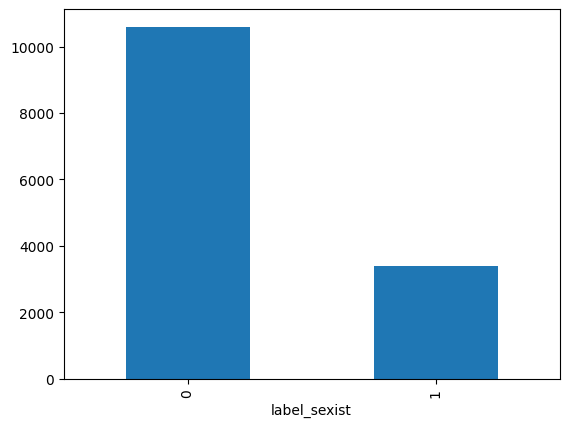

In [ ]:
train.groupby('label_sexist').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    rem_tag = re.sub(r'@\S+', '',rem_num)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_tag)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    return " ".join(filtered_words)

train['text']=train['text'].map(lambda s:preprocess(s))


In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(train['text']).toarray()
final_features.shape

(14000, 9670)

In [ ]:
'''
# this block is to split the dataset into training and testing set
X = train['text']
Y = train['label_category']

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

# instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=12)),
                     ('clf', RandomForestClassifier())])

# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))
'''

"\n# this block is to split the dataset into training and testing set \nX = train['text']\nY = train['label_category']\n\n#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)\n\n# instead of doing these steps one at a time, we can use a pipeline to complete then all at once\npipeline = Pipeline([('vect', vectorizer),\n                     ('chi',  SelectKBest(chi2, k=12)),\n                     ('clf', RandomForestClassifier())])\n\n# fitting our model and save it in a pickle for later use\nmodel = pipeline.fit(X_train, y_train)\nwith open('RandomForest.pickle', 'wb') as f:\n    pickle.dump(model, f)\n\nytest = np.array(y_test)\n\n# confusion matrix and classification report(precision, recall, F1-score)\nprint(classification_report(ytest, model.predict(X_test)))\nprint(confusion_matrix(ytest, model.predict(X_test)))\n"

In [ ]:
#X_test.head()

In [ ]:
train_df = pd.DataFrame()
train_df['text'] = train['text']
train_df['label_sexist'] = train['label_sexist']
train_df.head()

# this block is to split the dataset into training and testing set
#X['text'] = train_df['text']
#Y['label_category'] = train_df['label_category']

train_df, eval_df = train_test_split(train_df, test_size=0.10)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [ ]:
print(train_df.shape)
print(eval_df.shape)

(12600, 2)
(1400, 2)


In [ ]:
## Try splitting into train and test

# **ALBERT**

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import wandb

model_args = ClassificationArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 3
model_args.evaluate_during_training = False
model_args.manual_seed = 4
model_args.use_multiprocessing = True
model_args.train_batch_size = 16
model_args.eval_batch_size = 16
#model_args.labels_list = ['1. threats, plans to harm and incitement', '2. derogation', '3. animosity', '4. prejudiced discussions']
model_args.wandb_project = "Simple Sweep"

sweep_config = {
    "method": "bayes",  # grid, random
    "metric": {"name": "train_loss", "goal": "minimize"},
    "parameters": {
        "num_train_epochs": {"values": [2, 3, 5]},
        "learning_rate": {"min": 5e-5, "max": 4e-4},
    },
}

sweep_id = wandb.sweep(sweep_config, project="Simple Sweep")

wandb.init(project="Simple Sweep", entity="posh279")

wandb.config = {
  "learning_rate": 0.0001,
  "epochs": 3,
  "batch_size": 1
}

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: jw3x2tzy
Sweep URL: https://wandb.ai/posh279/Simple%20Sweep/sweeps/jw3x2tzy


wandb: Currently logged in as: svshruti28 (posh279). Use `wandb login --relogin` to force relogin


In [ ]:
albert=ClassificationModel('albert','albert-base-v1',num_labels=2,use_cuda=True,args=model_args) #{
        #"reprocess_input_data" : True,
        #"use_cached_eval_features":False,
        #"overwrite_output_dir": True,
        #"num_train_epochs": 3 }) #Increase for better performance


Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForSequenceClassification: ['predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.bias', 'predictions.dense.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

In [ ]:
albert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/12600 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

(2364, 0.37769082002026577)

In [ ]:
albert.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

Training loss,▄▃▃▃▃▂▄▄▂▄▃▄▃▂▄▁▂▁▃▆▁▁▄▂▂█▃▂▃▁▂▁▄▃▂▆▂▃▂▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.13471
global_step,2350
lr,0.0


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


({'mcc': 0.5433340038202764,
  'tp': 198,
  'tn': 977,
  'fp': 74,
  'fn': 151,
  'auroc': 0.8629862676833906,
  'auprc': 0.7329197986836089,
  'eval_loss': 0.40026080066507513},
 array([[ 1.66601562, -1.20996094],
        [-1.97460938,  1.39355469],
        [ 1.87011719, -1.39453125],
        ...,
        [-1.94140625,  1.37402344],
        [-0.47558594,  0.99316406],
        [ 0.30273438, -0.01182556]]),
 [{'guid': 4, 'text_a': 'sub trash women', 'text_b': None, 'label': 0},
  {'guid': 5, 'text_a': 'hate women though', 'text_b': None, 'label': 1},
  {'guid': 7, 'text_a': 'cock sucking interested period', 'text_b': None, 'label': 1},
  {'guid': 10, 'text_a': 'get past roastie years enough get chad give spawn comes like real man pick bill', 'text_b': None, 'label': 1},
  {'guid': 11, 'text_a': 'longer right call german women scum fight islam allowed ever return whatever country left', 'text_b': None, 'label': 1},
  {'guid': 14, 'text_a': 'lol hope shows slap around', 'text_b': None, 'l

# **BERT**

In [ ]:
bert=ClassificationModel('bert','bert-base-uncased',num_labels=2,use_cuda=True,args=model_args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
bert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/12600 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

(2364, 0.2951320582487055)

In [ ]:
bert.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

Training loss,█▇▅▄▂▄▅▄▂▃▄▃▅▂▆▄▃▇▄▃▅▅▂▂▂▄▆▁▂▁▁▁▃▁▁▃▁▇▁▁
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.00689
global_step,2350
lr,0.0


({'mcc': 0.559910392938568,
  'tp': 219,
  'tn': 956,
  'fp': 84,
  'fn': 141,
  'auroc': 0.8591412927350426,
  'auprc': 0.761628091751662,
  'eval_loss': 0.572618922049349},
 array([[ 2.0703125 , -2.2578125 ],
        [ 2.8046875 , -2.89453125],
        [ 2.75585938, -2.79492188],
        ...,
        [ 2.54492188, -2.703125  ],
        [ 2.3046875 , -2.39648438],
        [ 2.98242188, -3.13867188]]),
 [{'guid': 0, 'text_a': 'women really incest porn weird reason daddy issues destruction fatherhood western world imo leading driver', 'text_b': None, 'label': 1},
  {'guid': 8, 'text_a': 'woman black sow gunny sack standing hind legs', 'text_b': None, 'label': 1},
  {'guid': 11, 'text_a': 'keep around lick toilets clean show need pay janitor', 'text_b': None, 'label': 0},
  {'guid': 13, 'text_a': 'like seriously women way sit beside class ignored trying talk ones met could stranger interact', 'text_b': None, 'label': 0},
  {'guid': 27, 'text_a': 'wow lady reached threshold bitter betty s

# **ROBERTA**

In [ ]:
roberta=ClassificationModel('roberta','roberta-base',num_labels=2,use_cuda=True,args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
roberta.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/12600 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

(2364, 0.34857977465324597)

In [ ]:
roberta.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

Training loss,▄▄▄▂▂█▆▃▅▄▂▅▃▃▅▄▃▃▂▄▃▃▃▃▃▃▄▂▁▃▂▃▃▂▃▂▂▂▁▃
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.33523
global_step,2350
lr,0.0


({'mcc': 0.5866753922195035,
  'tp': 243,
  'tn': 939,
  'fp': 101,
  'fn': 117,
  'auroc': 0.8773384081196581,
  'auprc': 0.7781208666366812,
  'eval_loss': 0.41857026652856305},
 array([[-1.10253906,  0.81005859],
        [ 2.50585938, -2.25      ],
        [ 1.52929688, -1.66699219],
        ...,
        [ 0.63769531, -0.90576172],
        [ 0.83544922, -1.02636719],
        [ 1.25976562, -1.53222656]]),
 [{'guid': 8, 'text_a': 'woman black sow gunny sack standing hind legs', 'text_b': None, 'label': 1},
  {'guid': 13, 'text_a': 'like seriously women way sit beside class ignored trying talk ones met could stranger interact', 'text_b': None, 'label': 0},
  {'guid': 27, 'text_a': 'wow lady reached threshold bitter betty syndrome one url', 'text_b': None, 'label': 1},
  {'guid': 28, 'text_a': 'undeniably true asian women seem attracted white men racist', 'text_b': None, 'label': 1},
  {'guid': 38, 'text_a': 'cucked feminist government stop putting women charge things yes say woman', 't

# **DISTILBERT**

In [ ]:
distilbert=ClassificationModel('distilbert','distilbert-base-cased',num_labels=2,use_cuda=True,args=model_args)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifi

In [ ]:
distilbert.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/12600 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

(2364, 0.3001321128580574)

In [ ]:
distilbert.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

Training loss,▄▃▄▄▇▆▅▃▃▄█▃▄▄▂▅▆▄▃▃▄▅▃▃▅▂▁▁▃▅▅▃▁▅▄▁▆▁▂▂
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.09329
global_step,2350
lr,0.0


({'mcc': 0.6028349261131142,
  'tp': 220,
  'tn': 979,
  'fp': 61,
  'fn': 140,
  'auroc': 0.8776001602564103,
  'auprc': 0.774805005659764,
  'eval_loss': 0.47803653370250354},
 array([[ 1.703125  , -1.20800781],
        [ 1.609375  , -1.20800781],
        [ 2.953125  , -2.296875  ],
        ...,
        [ 2.796875  , -2.02734375],
        [ 2.875     , -2.41015625],
        [ 2.99414062, -2.31054688]]),
 [{'guid': 0, 'text_a': 'women really incest porn weird reason daddy issues destruction fatherhood western world imo leading driver', 'text_b': None, 'label': 1},
  {'guid': 8, 'text_a': 'woman black sow gunny sack standing hind legs', 'text_b': None, 'label': 1},
  {'guid': 27, 'text_a': 'wow lady reached threshold bitter betty syndrome one url', 'text_b': None, 'label': 1},
  {'guid': 28, 'text_a': 'undeniably true asian women seem attracted white men racist', 'text_b': None, 'label': 1},
  {'guid': 38, 'text_a': 'cucked feminist government stop putting women charge things yes say w

# **XLNET**

In [ ]:
xlnet=ClassificationModel('xlnet','xlnet-base-cased',num_labels=2,use_cuda=True,args=model_args)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias', 'sequence_summary.summary.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
xlnet.train_model(train_df, eval_df = eval_df) #, acc = f1_score)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/12600 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/788 [00:00<?, ?it/s]

(2364, 0.3773783908781868)

In [ ]:
xlnet.eval_model(eval_df)

/usr/local/lib/python3.8/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/88 [00:00<?, ?it/s]

Training loss,▅▅▆▅▅█▂▅▅▅▄▂▃▄▂▆▄▆▁▃▃▅▅▂▅▁▂▂▂▁▂▅▃▃▅▁▄▁▅▄
global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.39167
global_step,2350
lr,0.0


({'mcc': 0.6146684068775653,
  'tp': 235,
  'tn': 967,
  'fp': 73,
  'fn': 125,
  'auroc': 0.8925333867521368,
  'auprc': 0.7803035713922513,
  'eval_loss': 0.37562153285199945},
 array([[ 0.90478516, -1.22167969],
        [ 1.36132812, -1.94726562],
        [ 0.96142578, -1.2421875 ],
        ...,
        [ 1.72265625, -2.453125  ],
        [ 0.94335938, -1.26269531],
        [ 1.50683594, -2.15429688]]),
 [{'guid': 0, 'text_a': 'women really incest porn weird reason daddy issues destruction fatherhood western world imo leading driver', 'text_b': None, 'label': 1},
  {'guid': 8, 'text_a': 'woman black sow gunny sack standing hind legs', 'text_b': None, 'label': 1},
  {'guid': 13, 'text_a': 'like seriously women way sit beside class ignored trying talk ones met could stranger interact', 'text_b': None, 'label': 0},
  {'guid': 28, 'text_a': 'undeniably true asian women seem attracted white men racist', 'text_b': None, 'label': 1},
  {'guid': 40, 'text_a': 'got secret women like rated fi

In [ ]:
#wandb.join()

# **TEST**

In [ ]:
# Read the test data from the drive
test = pd.read_csv('/content/test_task_a_entries.csv',',', names=['rewire_id','text'])
dev = pd.read_csv('/content/dev_task_a_entries.csv',',', names=['rewire_id','text'])
dev_labels = pd.read_csv('/content/dev_task_a_labels.csv',',', names=['rewire_id','text'])
test=test.drop(test.index[0:1])
dev=dev.drop(dev.index[0:1])
dev_labels=dev_labels.drop(dev_labels.index[0:1])

In [ ]:
test['text']=test['text'].map(lambda s:preprocess(s))
dev['text']=dev['text'].map(lambda s:preprocess(s))

In [ ]:
test

,rewire_id,text
1,sexism2022_english-7207,oregon coast snow colder witch titty though
2,sexism2022_english-10731,tall man must certaily better women large musc...
3,sexism2022_english-11374,hit rode chode subreddit
4,sexism2022_english-7356,lawyer chick shoot mcdonald guy every time mat...
5,sexism2022_english-11976,true totally hating females want female ish
...,...,...
3996,sexism2022_english-4434,west teh jooz govt gynocracry showing men wome...
3997,sexism2022_english-6023,damn got voted hell friends lie especially lik...
3998,sexism2022_english-5208,approach attractive women trying see contents ...
3999,sexism2022_english-15798,wow women sluts whores never thought like


In [ ]:
dev

,rewire_id,text
1,sexism2022_english-11999,try hard guys get girls according guys many fr...
2,sexism2022_english-9895,sucks elected navy seal missouri awesome excep...
3,sexism2022_english-11623,walk away never look back reaches set date han...
4,sexism2022_english-19035,basically placed value
5,sexism2022_english-895,nyt asian part ways earth hired first place an...
...,...,...
1996,sexism2022_english-13861,none girls bang ecstasy weed
1997,sexism2022_english-6864,constant isnt whenever women fall behind matte...
1998,sexism2022_english-17934,yep fapping means chase vag better bring full ...
1999,sexism2022_english-4138,say stay crazy bitch wife directed towards men...


In [ ]:
dev_labels

,rewire_id,text
1,sexism2022_english-11999,not sexist
2,sexism2022_english-9895,not sexist
3,sexism2022_english-11623,not sexist
4,sexism2022_english-19035,not sexist
5,sexism2022_english-895,not sexist
...,...,...
1996,sexism2022_english-13861,not sexist
1997,sexism2022_english-6864,sexist
1998,sexism2022_english-17934,sexist
1999,sexism2022_english-4138,sexist


In [ ]:
recover= pd.read_csv('/content/test_task_a_entries.csv',',', names=['rewire_id', 'text'])
recover=recover.drop(recover.index[0:1])

sub = pd.DataFrame()
sub['rewire_id'] = recover['rewire_id']
### dev
recover_dev= pd.read_csv('/content/dev_task_a_entries.csv',',', names=['rewire_id', 'text'])
recover_dev=recover_dev.drop(recover_dev.index[0:1])

sub_dev = pd.DataFrame()
sub_dev['rewire_id'] = recover_dev['rewire_id']

# **ALBERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = albert.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = albert.predict(dev['text'].tolist())
print(predictions1_dev)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

['sexist' 'sexist' 'not sexist' ... 'sexist' 'sexist' 'not sexist']
['not sexist' 'not sexist' 'not sexist' ... 'not sexist' 'sexist'
 'not sexist']


In [ ]:
sub['albert_pred'] = prediction2
print(sub.head())

sub_dev['albert_pred'] = prediction2_dev
print(sub_dev.head())

                  rewire_id albert_pred
1   sexism2022_english-7207      sexist
2  sexism2022_english-10731      sexist
3  sexism2022_english-11374  not sexist
4   sexism2022_english-7356  not sexist
5  sexism2022_english-11976  not sexist
                  rewire_id albert_pred
1  sexism2022_english-11999  not sexist
2   sexism2022_english-9895  not sexist
3  sexism2022_english-11623  not sexist
4  sexism2022_english-19035  not sexist
5    sexism2022_english-895  not sexist


In [ ]:
y_true = dev_labels['text']
y_pred = sub_dev['albert_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

0.7658246535732103

# **BERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = bert.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = bert.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['bert_pred'] = prediction2
print(sub.head())

sub_dev['bert_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['bert_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 

0.769194827712383

In [ ]:
predictions1, raw_outputs = bert.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['sexist' 'sexist' 'not sexist' ... 'not sexist' 'sexist' 'sexist']


In [ ]:
sub['bert_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred
1,sexism2022_english-7207,not sexist,sexist
2,sexism2022_english-10731,sexist,sexist
3,sexism2022_english-11374,not sexist,not sexist
4,sexism2022_english-7356,not sexist,not sexist
5,sexism2022_english-11976,not sexist,not sexist


# **ROBERTA PREDICTIONS**

In [ ]:
predictions1, raw_outputs = roberta.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = roberta.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['roberta_pred'] = prediction2
print(sub.head())

sub_dev['roberta_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['roberta_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

0.7874029335634168

In [ ]:
predictions1, raw_outputs = roberta.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['not sexist' 'not sexist' 'not sexist' ... 'not sexist' 'sexist'
 'not sexist']


In [ ]:
sub['roberta_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred
1,sexism2022_english-7207,not sexist,sexist,not sexist
2,sexism2022_english-10731,sexist,sexist,not sexist
3,sexism2022_english-11374,not sexist,not sexist,not sexist
4,sexism2022_english-7356,not sexist,not sexist,not sexist
5,sexism2022_english-11976,not sexist,not sexist,not sexist


# **DISTILBERT PREDICTIONS**

In [ ]:
predictions1, raw_outputs = distilbert.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = distilbert.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['distilbert_pred'] = prediction2
print(sub.head())

sub_dev['distilbert_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['distilbert_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

0.7633002050430125

In [ ]:
predictions1, raw_outputs = distilbert.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['sexist' 'not sexist' 'not sexist' ... 'not sexist' 'sexist' 'not sexist']


In [ ]:
sub['distilbert_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred
1,sexism2022_english-7207,not sexist,sexist,not sexist,sexist
2,sexism2022_english-10731,sexist,sexist,not sexist,not sexist
3,sexism2022_english-11374,not sexist,not sexist,not sexist,not sexist
4,sexism2022_english-7356,not sexist,not sexist,not sexist,not sexist
5,sexism2022_english-11976,not sexist,not sexist,not sexist,not sexist


# **XLNET PREDICTIONS**

In [ ]:
predictions1, raw_outputs = xlnet.predict(test['text'].tolist())
print(predictions1)

predictions1_dev, raw_outputs_dev = xlnet.predict(dev['text'].tolist())
print(predictions1_dev)

prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

prediction2_dev = labelencoder.inverse_transform(predictions1_dev)
print(prediction2_dev)

sub['xlnet_pred'] = prediction2
print(sub.head())

sub_dev['xlnet_pred'] = prediction2_dev
print(sub_dev.head())

y_true = dev_labels['text']
y_pred = sub_dev['xlnet_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='macro')

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 

0.7689436341979355

In [ ]:
predictions1, raw_outputs = xlnet.predict(test['text'].tolist())
print(predictions1)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [ ]:
prediction2 = labelencoder.inverse_transform(predictions1)
print(prediction2)

['sexist' 'not sexist' 'not sexist' ... 'not sexist' 'sexist' 'sexist']


In [ ]:
sub['xlnet_pred'] = prediction2
sub.head()

,rewire_id,albert_pred,bert_pred,roberta_pred,distilbert_pred,xlnet_pred
1,sexism2022_english-7207,sexist,sexist,not sexist,sexist,sexist
2,sexism2022_english-10731,sexist,sexist,not sexist,sexist,not sexist
3,sexism2022_english-11374,not sexist,not sexist,not sexist,not sexist,not sexist
4,sexism2022_english-7356,not sexist,not sexist,not sexist,not sexist,not sexist
5,sexism2022_english-11976,not sexist,not sexist,not sexist,not sexist,not sexist


# **Formatting Dataframe for Submission**

In [ ]:
sub['albert'] = sub['albert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['bert'] = sub['bert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['roberta'] = sub['roberta_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['distilbert'] = sub['distilbert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub['xlnet'] = sub['xlnet_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

sub.head()

In [ ]:
sub_dev['albert'] = sub_dev['albert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['bert'] = sub_dev['bert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['roberta'] = sub_dev['roberta_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['distilbert'] = sub_dev['distilbert_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sub_dev['xlnet'] = sub_dev['xlnet_pred'].replace(['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

sub_dev.head()

In [ ]:
import statistics
pred_val = []
for i in range(1, sub.shape[0] + 1): #iterate over rows
    row_val = []
    for j in ['roberta', 'albert', 'xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value = sub.at[i, j] #get cell value
        row_val.append(value)
    pred_val.append(statistics.mode(row_val))
print(pred_val)

In [ ]:
import statistics
pred_val_dev = []
for i in range(1, sub_dev.shape[0] + 1): #iterate over rows
    row_val_dev = []
    for j in ['roberta', 'albert', 'xlnet', 'bert', 'distilbert']: #iterate over columns   #'albert'
        value_dev = sub_dev.at[i, j] #get cell value
        row_val_dev.append(value_dev)
    pred_val_dev.append(statistics.mode(row_val_dev))
print(pred_val_dev)

In [ ]:
sub['label_pred_enc'] = pred_val
sub['label_pred'] = sub['label_pred_enc'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'])
sub.head()

In [ ]:
sub_dev['label_pred_enc'] = pred_val_dev
sub_dev['label_pred'] = sub_dev['label_pred_enc'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['1.1 Threats of harm', '1.2 Incitement and encouragement of harm', '2.1 Descriptive attacks', '2.2 Aggressive and emotive attacks', '2.3 Dehumanising attacks and overt sexual objectification', '3.1 Causal use of gendered slurs, profanities and insults', '3.2 Immutable gender differences and gender stereotypes', '3.3 Backhanded gendered compliments', '3.4 Condescending explanations or unwelcome advice', '4.1 Supporting mistreatment of individual women', '4.2 Supporting systemic discrimination against women as a group'])
sub_dev.head()

In [ ]:
final_sub = pd.DataFrame()
final_sub['rewire_id'] = sub['rewire_id']
final_sub['label_pred'] = sub['label_pred']

final_sub.head(100)

In [ ]:
final_sub_dev = pd.DataFrame()
final_sub_dev['rewire_id'] = sub_dev['rewire_id']
final_sub_dev['label_pred'] = sub_dev['label_pred']

final_sub_dev.head(100)

In [ ]:
y_true = dev_labels['text']
y_pred = final_sub_dev['label_pred']

f1_score(y_true=y_true, y_pred=y_pred, average='weighted')

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.839
Confusion matrix, without normalization


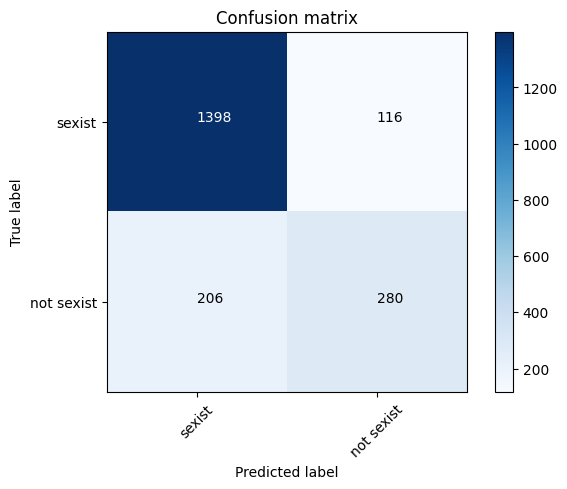

In [ ]:
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_true, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=['sexist', 'not sexist'])

In [ ]:
final_sub.to_csv('/content/SemEval_TaskC.csv')